In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets, preprocessing, metrics, model_selection, pipeline
seaborn.set_style("white")

import tensorflow as tf
import sys
import keras
import keras.backend as K

%matplotlib inline

Using TensorFlow backend.


In [3]:
print(tf.__version__) 
print(keras.__version__) 

2.1.0
2.3.1


In [4]:
pwd

'/kaggle/working'

In [5]:
#loading the daset
digits=datasets.load_digits()
X=digits.data
X.shape

(1797, 64)

In [6]:
#labels
Y=digits.target
Y.shape

(1797,)

In [7]:
#standardization of the data
#axis=0 -> column
#axis=1 -> row
X_mean=np.mean(X,axis=1,keepdims=True)
X_std=np.std(X,axis=1,keepdims=True)
X=(X-X_mean)/X_std

In [8]:
#view the distribution of values
#plt.hist(X.flat, bins=25, normed=True)
#plt.ylabel("$p(bin_i)$");
#plt.ylabel("$bin_i$");

In [9]:
def plot_images(x, **kwargs):
    n_pix = int(np.sqrt(np.prod(X.shape[1:]))) #assumes images are square
    im_indices = np.random.choice(len(x), 20)
    fig, axes = plt.subplots(nrows=4,ncols=5, figsize=(5,5), sharex=True, sharey=True, frameon=False)
    for i,ax in enumerate(axes.flat):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        curr_i = im_indices[i]
        ax.imshow(x[curr_i].reshape(n_pix,n_pix), aspect="equal", **kwargs)
        ax.axis('off')

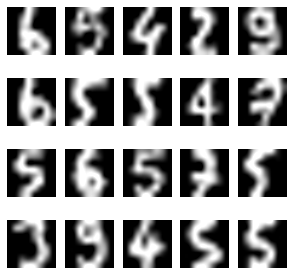

In [10]:
plot_images(X, cmap="gray", interpolation="spline16")

In [11]:
#split the data to test and train data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [12]:
#reshape data
X_keras=X_train.reshape(1437,64,1)
X_keras.shape
X_keras_test=X_test.reshape(360,64,1)
X_keras_test.shape

(360, 64, 1)

In [13]:
# Create a Keras Sequential model
# We do this by passing a list of layers to the Sequential model

model = keras.Sequential([
    keras.layers.Conv1D(filters=64,kernel_size=2,input_shape=(64,1)),
   # keras.layers.Dropout(0.2),
    keras.layers.MaxPool1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(100 ,activation="relu"),
    keras.layers.Dense(64 ,activation="relu"),
    #keras.layers.Dense(32 ,activation="relu"),
    
    #keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary() #summary provides an at-a-glance look at the model we've built

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 63, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 31, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1984)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               198500    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 205,806
Trainable params: 205,806
Non-trainable params: 0
________________________________________________

In [14]:
acc_list=[]
# Compile the network
model.compile("nadam", "sparse_categorical_crossentropy", metrics=["acc"])


In [15]:

model.fit(X_keras,Y_train,epochs=30,
    validation_split=0.25, verbose=0,callbacks=[ keras.callbacks.ReduceLROnPlateau(
        factor=.5, patience=1, min_lr=1e-7, verbose=0),
    keras.callbacks.EarlyStopping(patience=4, verbose=0)])
 
acc = model.evaluate(X_keras_test,Y_test)
acc_list.append(acc)

360/360 [==============================] - 0s 61us/step


In [16]:
print(acc_list)

[[0.0793027599238687, 0.980555534362793]]


In [17]:
#save the model
model.save('my_model.h5')

In [18]:
#convert keras model to tflite
model = tf.keras.models.load_model('my_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

826132

In [19]:

#get text file of the labels 
f= open('labels.txt','w')
for i in countint.index:
    f.write(str(i)+"\n")

NameError: name 'countint' is not defined

In [20]:
#YY=pd.DataFrame(Y,columns=['count'])
#countt=YY.groupby('count').count()
#countint=pd.DataFrame(countt)
#countint.index